In [1]:
import re
import numpy as np 
import pandas as pd
import os

def experiment_name(file):
    match = re.search('(_seed_[0-9]*)', file)
    return re.search('/(rf[^/]*)/' ,file[:match.start()]+file[match.end():]).groups(0)[0]

files = [os.path.join('sessions/scal/simulations/', folder,'log/scal_system.log') for folder in os.listdir('sessions/scal/simulations/')]

experiments = list(set(map(experiment_name, files)))
print(len(experiments))
print(len(files))

all_data = { 'target recall': [],
                              'ranking function': [],
                              'effort':[],
                              'n':[],
                              'seed': [],
                              'relevant found': [],
                              'prevalence': [],
                              'precision': [],
                              'recall': [],
                              'f1-score': [],
                              'threshold': [],
                              'accuracy': [],
                              'j': [],
                              'TP': [],
                              'TN': [],
                              'FP': [],
                              'FN': [],
                              'N': [],
                              'unlabeled size': [],
                              'experiment_name':[],
                            }

data={}
for experiment in experiments:
    experiment_files = [file for file in files if experiment_name(file)==experiment]
    data[experiment]= { 'target recall': [],
                              'ranking function': [],
                              'effort':[],
                              'n':[],
                              'seed': [],
                              'relevant found': [],
                              'prevalence': [],
                              'precision': [],
                              'recall': [],
                              'f1-score': [],
                              'threshold': [],
                              'accuracy': [],
                              'j': [],
                              'TP': [],
                              'TN': [],
                              'FP': [],
                              'FN': [],
                              'N': [],
                              'unlabeled size': [],
                            #     'representation': [],
                            }
    for file in experiment_files:
        content = open(file, 'r').read()
        if 'SIMULATION RESULTS' in content:
            data[experiment]['target recall'].append(float(re.search('target_recall=\ *([0-9\.]*)',content).groups()[0]))
            data[experiment]['ranking function'].append((re.search('ranking_function=\ *([^\ \n]*)',content).groups()[0]))
            data[experiment]['effort'].append(int(re.search('Effort[^=]*=\ *([^\ \n]*)',content).groups()[0]))
            data[experiment]['n'].append(int(re.search('batch_size_cap=\ *([0-9]*)',content).groups()[0]))
            data[experiment]['seed'].append((re.search('seed\ [^=]*=\ *([0-9]*)',content).groups()[0]))
            data[experiment]['N'].append(int(re.search('random_sample_size=\ *([0-9]*)',content).groups()[0]))
            data[experiment]['unlabeled size'].append(int(re.search('len\(unlabeled_collection\)=\ *([0-9]*)',content).groups()[0]))
            data[experiment]['accuracy'].append(float(re.search('accuracy=([\.0-9]*)',content).groups()[0]))
            data[experiment]['precision'].append(float(re.search('SIMULATION RESULTS.*precision=([\.0-9]*)',content).groups()[0]))
            data[experiment]['recall'].append(float(re.search('SIMULATION RESULTS.*recall=([\.0-9]*)',content).groups()[0]))
            data[experiment]['f1-score'].append(float(re.search('SIMULATION RESULTS.*F1-score=([\.0-9]*)',content).groups()[0]))
            data[experiment]['prevalence'].append(float(re.search('Est. prevalecence\ *=([\.0-9]*)',content).groups()[0]))
            data[experiment]['TN'].append(int(re.search('SIMULATION RESULTS.*TN=([0-9]*)',content).groups()[0]))
            data[experiment]['FN'].append(int(re.search('SIMULATION RESULTS.*FN=([0-9]*)',content).groups()[0]))
            data[experiment]['TP'].append(int(re.search('SIMULATION RESULTS.*TP=([0-9]*)',content).groups()[0]))
            data[experiment]['FP'].append(int(re.search('SIMULATION RESULTS.*FP=([0-9]*)',content).groups()[0]))
            data[experiment]['relevant found'].append((re.search('Relevant found \(total\) =(.*)',content).groups()[0]))
            data[experiment]['threshold'].append(float(re.search('Threshold\ *=([\.0-9]*)',content).groups()[0]))
            data[experiment]['j'].append(int(re.search('j\ *=([0-9]*)',content).groups()[0]))
            

    if len(data[experiment]['threshold'])!=0:
        all_data['experiment_name'].append(experiment)
        
    for key in data[experiment]:
        if len(data[experiment][key])!=0: # ONLY if simulation incomplete
            

            if type(data[experiment][key][0])==int or type(data[experiment][key][0])==float:
                all_data[key].append(np.average((data[experiment][key])))
            elif type(data[experiment][key][0])==str:
                all_data[key].append(';'.join((data[experiment][key])))
df = pd.DataFrame(all_data)  
# df

72
145


Text(767.7272727272725, 0.5, 'N')

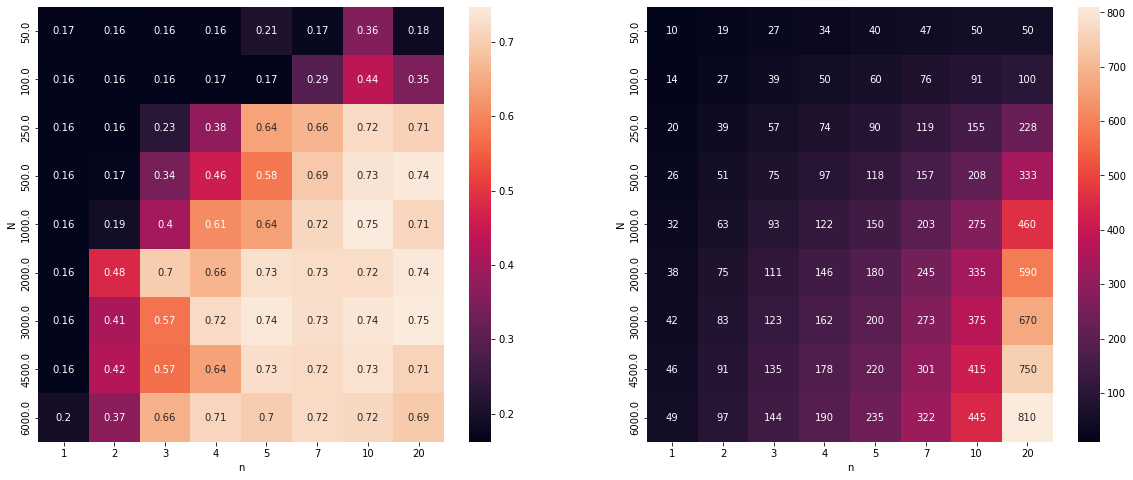

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = {1:[],
                2:[],
                3:[],
                4:[],
                5:[],
                7:[],
                10:[],
                20:[],
               }

for n in sorted(list(set(df['n']))):
    for N in sorted(list(set(df['N']))):
        f1=0
        if len(df[(df['N']==N) & (df['n']==n)]['f1-score'])!=0:
            f1 = df[(df['N']==N) & (df['n']==n)]['f1-score'].iloc[0]
            
        heatmap_data[int(n)].append(f1)

fig,ax=plt.subplots(1,2, figsize=(20,8))

sns.heatmap(pd.DataFrame(heatmap_data, index=sorted(list(set(df['N'])))), annot=True,ax=ax[0])
ax[0].set_xlabel('n')
ax[0].set_ylabel('N')

import math
def effort(N, n):
    B=1
    effort=0
    while N>0:
        batch = min(B,n)
        effort+=min(batch,N)
        N-=min(B,N)
#         print(f'B={B:4} - N={N:10} - effort={effort:5}')
        B+=math.ceil(B/10)
        
    return effort

import seaborn as sns
heatmap_data = {1:[],
                2:[],
                3:[],
                4:[],
                5:[],
                7:[],
                10:[],
                20:[],
               }
for n in sorted(list(set(df['n']))):
    for N in sorted(list(set(df['N']))):
        heatmap_data[int(n)].append(int(effort(N,n)))
sns.heatmap(pd.DataFrame(heatmap_data, index=sorted(list(set(df['N'])))), annot=True,fmt=".0f",ax=ax[1])
ax[1].set_xlabel('n')
ax[1].set_ylabel('N')

Text(33.0, 0.5, 'N')

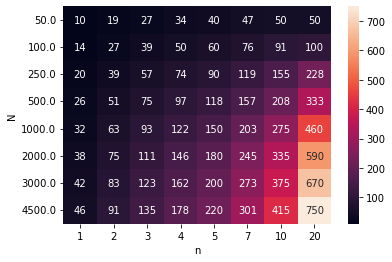

In [17]:
import os
files = [os.path.join('sessions/scal/simulations/', folder,'log/scal_system.log') for folder in os.listdir('sessions/scal/simulations/')]
assert all(os.path.isfile(file) for file in files)

import re
import pandas as pd
data = {
    'target recall': [],
    'ranking function': [],
    'effort':[],
    'b':[],
    'seed': [],
    'relevant found': [],
    'prevalence': [],
    'precision': [],
    'recall': [],
    'f1-score': [],
    'threshold': [],
    'accuracy': [],
    'j': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'N': [],
    'unlabeled size': [],
    'representation': [],
}
for file in files:
    content = open(file, 'r').read()
    if 'SIMULATION RESULTS' in content:
        data['target recall'].append(float(re.search('target_recall=\ *([0-9\.]*)',content).groups()[0]))
        data['ranking function'].append((re.search('ranking_function=\ *([^\ \n]*)',content).groups()[0]))
        data['effort'].append(int(re.search('Effort[^=]*=\ *([^\ \n]*)',content).groups()[0]))
        data['b'].append(int(re.search('batch_size_cap=\ *([0-9]*)',content).groups()[0]))
        data['seed'].append(int(re.search('seed\ [^=]*=\ *([0-9]*)',content).groups()[0]))
        data['N'].append(int(re.search('random_sample_size=\ *([0-9]*)',content).groups()[0]))
        data['unlabeled size'].append(int(re.search('len\(unlabeled_collection\)=\ *([0-9]*)',content).groups()[0]))
        data['accuracy'].append(float(re.search('accuracy=([\.0-9]*)',content).groups()[0]))
        data['precision'].append(float(re.search('SIMULATION RESULTS.*precision=([\.0-9]*)',content).groups()[0]))
        data['recall'].append(float(re.search('SIMULATION RESULTS.*recall=([\.0-9]*)',content).groups()[0]))
        data['f1-score'].append(float(re.search('SIMULATION RESULTS.*F1-score=([\.0-9]*)',content).groups()[0]))
        data['prevalence'].append(float(re.search('Est. prevalecence\ *=([\.0-9]*)',content).groups()[0]))
        data['TN'].append(int(re.search('SIMULATION RESULTS.*TN=([0-9]*)',content).groups()[0]))
        data['FN'].append(int(re.search('SIMULATION RESULTS.*FN=([0-9]*)',content).groups()[0]))
        data['TP'].append(int(re.search('SIMULATION RESULTS.*TP=([0-9]*)',content).groups()[0]))
        data['FP'].append(int(re.search('SIMULATION RESULTS.*FP=([0-9]*)',content).groups()[0]))
        data['relevant found'].append((re.search('Relevant found \(total\) =(.*)',content).groups()[0]))
        data['threshold'].append(float(re.search('Threshold\ *=([\.0-9]*)',content).groups()[0]))
        data['j'].append(int(re.search('j\ *=([0-9]*)',content).groups()[0]))
        if 'glove2' in file:
            data['representation'].append('GloVe2')
        elif 'glove3' in file:
            data['representation'].append('GloVe3')
        elif 'glove' in file:
            data['representation'].append('GloVe')
        elif 'sbert' in file:
            data['representation'].append('sbert')
        else:
            data['representation'].append('BoW')
df = pd.DataFrame(data)
print(df.shape)
metrics = ['TN', 'TP', 'FN', 'FP', 'accuracy', 'precision', 'recall', 'f1-score', 'prevalence' ]

groupby=['target recall', 'ranking function', 'representation']

df['experiment_name'] = ['_'.join([str(df[elem].iloc[idx]) for elem in groupby]) for idx in range(len(df))]
df[groupby+['experiment_name']].shape

(37, 20)


(37, 4)

27
54


In [47]:


print(files[0])
remove_seed(files[0])

sessions/scal/simulations/rf_relevance_N_50_n_7_tr_0.8_d_DP_repr_BoW_seed_16953/log/scal_system.log


'sessions/scal/simulations/rf_relevance_N_50_n_7_tr_0.8_d_DP_repr_BoW/log/scal_system.log'

In [27]:

(set((['_'.join(file.split('_')[:-3]) for file in  files ])))

{'sessions/scal/simulations/rf_relevance_N_100_n_10_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_1_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_20_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_2_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_3_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_4_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_5_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_100_n_7_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_250_n_1_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_250_n_2_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_250_n_3_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_50_n_10_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_relevance_N_50_n_1_tr_0.8_d_DP_repr_BoW',
 'sessions/scal/simulations/rf_releva

In [18]:
data = {metric:[] for metric in metrics}
data['f1-score_std']=[]
data['effort']=[]
data['experiment_name']=[]
for (effort,exp_name),auxdf in df.groupby(['effort','experiment_name']):
#     print(type(auxdf))
#     print(auxdf.shape)
#     auxdf =pd.DataFrame(auxdf[0])
#     print(f'{effort}, {exp_name}')
#     print(auxdf.shape)
    if auxdf.shape[0]!=10:
        print('count=  '+str(auxdf.shape[0]))
        print('name=   '+exp_name)
        print('effort= '+str(effort))
        print('N=      '+str(auxdf['N'].iloc[0]))
        print(f'experiment_name={exp_name}')
        print()
    data['f1-score_std'].append(auxdf.select_dtypes(include='number').std(axis=0)['f1-score'])
#     print((auxdf.select_dtypes(include='number').std(axis=0)['f1-score']))
    auxdf=auxdf.select_dtypes(include='number').mean(axis=0)
    
#     print(auxdf)

    data['effort'].append(effort)
    data['experiment_name'].append(exp_name)
    for metric in metrics:
        data[metric].append(auxdf[metric])
aggregatedf = pd.DataFrame(data)
# aggregatedf.to_csv('performance_at_276.csv')
aggregatedf
aggregatedf.shape

count=  2
name=   0.8_relevance_BoW
effort= 10
N=      50
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 14
N=      100
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 19
N=      50
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 20
N=      250
experiment_name=0.8_relevance_BoW

count=  4
name=   0.8_relevance_BoW
effort= 27
N=      50
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 34
N=      50
experiment_name=0.8_relevance_BoW

count=  4
name=   0.8_relevance_BoW
effort= 39
N=      100
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 40
N=      50
experiment_name=0.8_relevance_BoW

count=  2
name=   0.8_relevance_BoW
effort= 47
N=      50
experiment_name=0.8_relevance_BoW

count=  6
name=   0.8_relevance_BoW
effort= 50
N=      50
experiment_name=0.8_relevance_BoW

count=  1
name=   0.8_relevance_BoW
effort= 57
N=      250
experime

(15, 12)

In [22]:
df[df['experiment_name']=='0.8_relevance_BoW']

,target recall,ranking function,effort,b,seed,relevant found,prevalence,precision,recall,f1-score,...,accuracy,j,TP,TN,FP,FN,N,unlabeled size,representation,experiment_name
0,0.8,relevance,47,7,16953,7165(3 labeled / 7162 suggested),0.0420,0.091,1.0,0.167,...,0.100,0,652,73,6510,0,50,7282,BoW,0.8_relevance_BoW
1,0.8,relevance,60,5,8572,7227(5 labeled / 7222 suggested),0.0420,0.090,1.0,0.165,...,0.090,0,650,0,6572,0,100,7282,BoW,0.8_relevance_BoW
2,0.8,relevance,39,3,26370,7250(7 labeled / 7243 suggested),0.0735,0.089,1.0,0.164,...,0.089,0,648,0,6595,0,100,7282,BoW,0.8_relevance_BoW
3,0.8,relevance,14,1,6197,7272(4 labeled / 7268 suggested),0.0840,0.090,1.0,0.164,...,0.090,0,651,0,6617,0,100,7282,BoW,0.8_relevance_BoW
4,0.8,relevance,10,1,20278,7275(3 labeled / 7272 suggested),0.0630,0.090,1.0,0.165,...,0.090,0,652,0,6620,0,50,7282,BoW,0.8_relevance_BoW
5,0.8,relevance,34,4,1632,7253(6 labeled / 7247 suggested),0.1050,0.090,1.0,0.164,...,0.090,0,649,1,6598,0,50,7282,BoW,0.8_relevance_BoW
6,0.8,relevance,20,1,4834,7269(7 labeled / 7262 suggested),0.0882,0.089,1.0,0.164,...,0.089,0,648,0,6614,0,250,7282,BoW,0.8_relevance_BoW
7,0.8,relevance,39,2,23414,7251(8 labeled / 7243 suggested),0.0546,0.089,1.0,0.164,...,0.089,0,647,0,6596,0,250,7282,BoW,0.8_relevance_BoW
8,0.8,relevance,91,10,13639,2073(12 labeled / 2061 suggested),0.1155,0.312,1.0,0.476,...,0.803,0,643,5130,1418,0,100,7282,BoW,0.8_relevance_BoW
9,0.8,relevance,40,5,14145,7235(7 labeled / 7228 suggested),0.1260,0.090,1.0,0.165,...,0.091,0,648,14,6580,0,50,7282,BoW,0.8_relevance_BoW


In [19]:
aggregatedf

,TN,TP,FN,FP,accuracy,precision,recall,f1-score,prevalence,f1-score_std,effort,experiment_name
0,0.000000,652.500000,0.0,6619.500000,0.090000,0.090000,1.0,0.16500,0.042000,0.000000,10,0.8_relevance_BoW
1,0.000000,651.000000,0.0,6617.000000,0.090000,0.090000,1.0,0.16400,0.089250,0.000000,14,0.8_relevance_BoW
2,0.000000,650.000000,0.0,6613.000000,0.089000,0.089000,1.0,0.16400,0.094500,0.000000,19,0.8_relevance_BoW
3,0.000000,648.000000,0.0,6614.000000,0.089000,0.089000,1.0,0.16400,0.092400,0.000000,20,0.8_relevance_BoW
4,0.000000,648.500000,0.0,6606.500000,0.089500,0.089500,1.0,0.16400,0.110275,0.000816,27,0.8_relevance_BoW
5,0.500000,650.000000,0.0,6597.500000,0.090000,0.090000,1.0,0.16450,0.084000,0.000707,34,0.8_relevance_BoW
6,0.000000,646.250000,0.0,6596.750000,0.089000,0.089000,1.0,0.16375,0.078050,0.000500,39,0.8_relevance_BoW
7,1390.000000,648.000000,0.0,5204.000000,0.281000,0.117500,1.0,0.20900,0.126000,0.062225,40,0.8_relevance_BoW
8,383.500000,651.000000,0.0,6200.500000,0.143000,0.095000,1.0,0.17400,0.063000,0.009899,47,0.8_relevance_BoW
9,1633.666667,648.666667,0.0,4949.666667,0.315667,0.135333,1.0,0.23400,0.080933,0.096991,50,0.8_relevance_BoW


In [10]:
# import sys
# sys.path.append('/home/ec2-user/SageMaker/mariano/repositories/tdmstudio-high-recall-information-retrieval-system/')
# from utils.oracle import Oracle
# from utils.io import info
# from utils.data_item import GenericSyntheticDocument
# from utils.scal import SCAL
# import spacy




# representation='BoW' # Could also be 'GloVe' or 'sbert'
# seed = 1234
# ranking_function='relevance'
# N=10
# n=5
# target_recall=0.8

# # Unlabeled collection
# unlabeled = Oracle.get_collection()
# info(f'Number of relevant articles found: {len(unlabeled):,}')
# representations = Oracle.get_document_representation(type_=representation) 
# info(f'Number of representations found:   {len(representations):,} (shape={representations[list(representations)[0]].shape})')

# # Synthetic Document
# topic_description='displaced persons dp'

# doc = GenericSyntheticDocument(topic_description,
#                                vocab_path='/home/ec2-user/SageMaker/mariano/notebooks/07. Simulation/data/DP_vocab/vocab.txt', 
#                                idf_path='/home/ec2-user/SageMaker/mariano/notebooks/07. Simulation/data/DP_vocab/idf.txt',
#                               )
# doc.set_relevant()

# if representation=='BoW':
#     representations[doc.id_] = doc.vector()
# elif representation=='GloVe':
#     nlp = spacy.load('en_core_web_lg')
#     representations[doc.id_] = nlp(topic_description).vector
# elif representation=='sbert':
#     representations[doc.id_] = pickle.load(open('../sbert_synthetic_dp_vec.pickle', 'rb'))


# info(f'Topic description: {topic_description} (shape={doc.vector().shape})')


# session_name=f'rf_{ranking_function}_N_{N}_n_{n}_tr_{target_recall}_d_DP_repr_{representation}_seed_{seed}'

# info(f'RUNNING: {session_name}')

# SCAL(session_name, 
#      labeled_collection=[doc], 
#      unlabeled_collection=unlabeled,
#      random_sample_size=N,
#      batch_size_cap=5,
#      simulation=True,
#      target_recall=0.8,
#      seed=seed,
#      ranking_function=ranking_function,
#      item_representation=representations,
#     ).run()

NameError: name 'metrics' is not defined

In [6]:
# import spacy
# nlp = spacy.load('en_core_web_lg')

# topic_description='displaced persons dp'

# doc = GenericSyntheticDocument(topic_description,
#                                vocab_path='/home/ec2-user/SageMaker/mariano/notebooks/07. Simulation/data/DP_vocab/vocab.txt', 
#                                idf_path='/home/ec2-user/SageMaker/mariano/notebooks/07. Simulation/data/DP_vocab/idf.txt',
#                               )
# doc.set_relevant()

# # if glove:
# representations[doc.id_] = nlp(topic_description).vector
# # elif sbert:
# #     representations[doc.id_] = pickle.load(open('../sbert_synthetic_dp_vec.pickle', 'rb'))

# # else:
# #     representations[doc.id_] = doc.vector()

# info(f'Topic description: {topic_description} (shape={doc.vector().shape})')



# seed = 1234
# info(f'RUNNING: {f}')

# SCAL('test', 
#      labeled_collection=[doc], 
#      unlabeled_collection=unlabeled,
#      random_sample_size=10,
#      batch_size_cap=5,
#      simulation=True,
#      target_recall=0.8,
#      seed=seed,
#      ranking_function='relevance',
#      item_representation=representations,
#     ).run()